In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import animation
from IPython.display import HTML

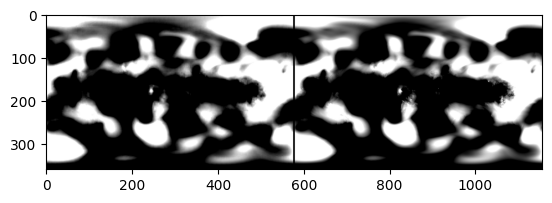

In [10]:
img = mpimg.imread('/discover/nobackup/awang17/FCN/afno_backbone_finetune/1/7/1.png')
imgplot = plt.imshow(img)
plt.show()

In [2]:
import h5py

In [4]:
f = h5py.File('/discover/nobackup/awang17/FCN/afno_backbone/0/autoregressive_predictions_T2M.h5','r')

In [17]:
for k,v in f.items():
    print(k, v)

acc <HDF5 dataset "acc": shape (365, 24, 19), type "<f4">
acc_coarse <HDF5 dataset "acc_coarse": shape (365, 24, 19), type "<f4">
acc_coarse_unweighted <HDF5 dataset "acc_coarse_unweighted": shape (365, 24, 19), type "<f4">
acc_unweighted <HDF5 dataset "acc_unweighted": shape (365, 24, 19), type "<f4">
rmse <HDF5 dataset "rmse": shape (365, 24, 19), type "<f4">
rmse_coarse <HDF5 dataset "rmse_coarse": shape (365, 24, 19), type "<f4">


In [19]:
acc = f['acc']

In [21]:
acc[...]

array([[[1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ],
        [0.999081  , 0.99892896, 0.9984729 , ..., 0.9971358 ,
         0.99648434, 0.99367577],
        [0.9979819 , 0.9977419 , 0.9965528 , ..., 0.9930062 ,
         0.99154663, 0.98536086],
        ...,
        [0.9392991 , 0.9182248 , 0.89023805, ..., 0.71852106,
         0.6510008 , 0.6691119 ],
        [0.93122417, 0.9082703 , 0.8774047 , ..., 0.6904841 ,
         0.6095925 , 0.6358105 ],
        [0.92186254, 0.89668256, 0.86065096, ..., 0.65596193,
         0.55802315, 0.5952479 ]],

       [[1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ],
        [0.99907374, 0.99907774, 0.9985742 , ..., 0.9973688 ,
         0.9966114 , 0.9941046 ],
        [0.99809796, 0.9980396 , 0.99675936, ..., 0.99312377,
         0.9912906 , 0.9866538 ],
        ...,
        [0.94524854, 0.93017554, 0.89931136, ..., 0.7462019 ,
         0.6813206 , 0.6820374 ],
        [0.9

In [11]:
import numpy as np

In [12]:
month = 2
day = 15
directory = '/discover/nobackup/awang17/SFNO/interpolate'
a = np.load(directory + '/denorm_ground_truth{:02d}{:02d}.npy'.format(month, day))
b = np.load(directory + '/denorm_prediction{:02d}{:02d}.npy'.format(month, day))
#c = np.load(directory + '/anomaly_north.npy'.format(month, day))

In [5]:
a.shape

(25, 19, 360, 576)

In [6]:
a[:,7,250,150]

array([269.95077533, 269.4051515 , 269.05184957, 268.82214392,
       268.68475346, 268.61321995, 268.5719908 , 268.62078844,
       268.79846171, 268.78271482, 268.76306178, 268.81765751,
       269.21554561, 271.1852723 , 274.03439325, 276.64947517,
       278.61407471, 280.06546016, 280.87725837, 281.22055055,
       281.35171514, 280.56567375, 277.92114257, 275.91522217,
       275.83221605])

In [7]:
b.shape

(25, 19, 360, 576)

In [8]:
b[:,7,250,150]

array([269.95077533, 269.14691407, 268.40725263, 267.78108213,
       267.22763349, 266.78353784, 266.45806759, 266.31075732,
       266.35377259, 266.45655542, 266.52414386, 266.54260227,
       266.96665195, 269.45129971, 272.57188886, 275.87719465,
       278.63073572, 280.42752097, 281.59185616, 282.16836993,
       282.21911857, 281.09107016, 277.98030787, 276.07742617,
       275.83221605])

In [10]:
def show_index(time, field=7):
    fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(10, 3.5))
    slice_a = a[:,field,:,:]
    slice_b = b[:,field,:,:]
    vmin = slice_a.min()#np.vstack([slice_a, slice_b]).min()
    vmax = slice_a.max()#np.vstack([slice_a, slice_b]).max()
    g1 = ax[0].pcolormesh(slice_b[time,:,:], vmin=vmin, vmax=vmax, cmap='plasma')
    ax[0].title.set_text('Prediction')
    ax[0].set_aspect(1)
    g2 = ax[1].pcolormesh(slice_a[time,:,:], vmin=vmin, vmax=vmax, cmap='plasma')
    ax[1].title.set_text('Ground Truth')
    ax[1].set_aspect(1)
    fig.colorbar(g2)
    fig.suptitle(f'Forward T2M (K) on 2020-{month:02d}-{day:02d} at {time:02d}:00')
    plt.savefig(f'T2M-{month:02d}{day:02d}-{time:02d}.png')
    #plt.show()
    plt.close()

In [7]:
def backward_show_index(time, field=7):
    fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(10, 3.5))
    slice_a = a[:,field,:,:]
    slice_b = b[:,field,:,:]
    #vmin = np.vstack([slice_a, slice_b]).min()
    #vmax = np.vstack([slice_a, slice_b]).max()
    g1 = ax[0].pcolormesh(slice_b[time,:,:], vmin=slice_a.min(), vmax=slice_a.max(), cmap='plasma')
    ax[0].title.set_text('Prediction')
    ax[0].set_aspect(1)
    g2 = ax[1].pcolormesh(slice_a[time,:,:], vmin=slice_a.min(), vmax=slice_a.max(), cmap='plasma')
    ax[1].title.set_text('Ground Truth')
    ax[1].set_aspect(1)
    fig.colorbar(g2)
    fig.suptitle(f'Backward Q500 (kg kg-1) on 2020-{month:02d}-{day:02d} at {23-time:02d}:00')
    #plt.savefig(f'Q500-{month:02d}{day:02d}-{time:02d}.png')
    #plt.close()

In [17]:
def interp_show_index(time, field=7):
    fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(10, 3.5))
    slice_a = a[:,field,:,:]
    slice_b = b[:,field,:,:]
    vmin = np.vstack([slice_a]).min()
    vmax = np.vstack([slice_a]).max()
    g1 = ax[0].pcolormesh(slice_b[time,:,:], vmin=vmin, vmax=vmax, cmap='plasma')
    ax[0].title.set_text('Prediction')
    ax[0].set_aspect(1)
    g2 = ax[1].pcolormesh(slice_a[time,:,:], vmin=vmin, vmax=vmax, cmap='plasma')
    ax[1].title.set_text('Ground Truth')
    ax[1].set_aspect(1)
    fig.colorbar(g2)
    fig.suptitle(f'Interpolated T2M (K) on 2020-{month:02d}-{day:02d} at {time:02d}:00')
    #plt.savefig(f'T2M-{month:02d}{day:02d}-{time:02d}.png')
    ax[1].plot(125, 255, 'wo')
    plt.show()
    plt.close()

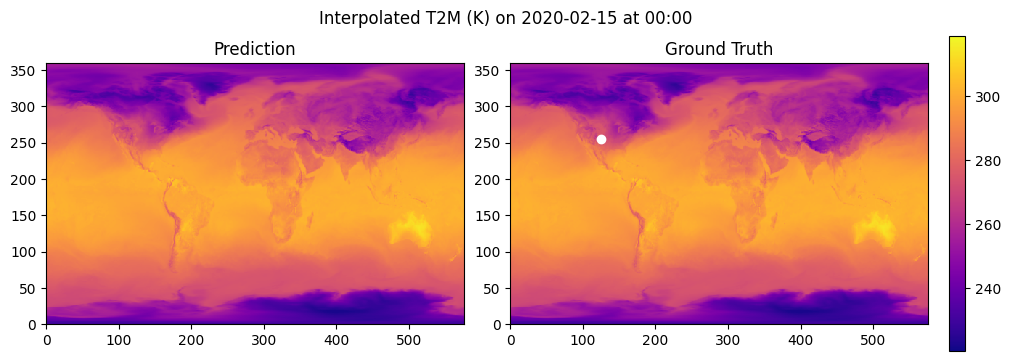

In [18]:
for i in range(1):
    interp_show_index(i)

In [20]:
def plot_corr(field, prefix=''):
    variables = ['H250', 'H500', 'H850', 'PS', 'Q500', 'Q850', 'SLP', 'T2M', 'T500', 'T850', 'TQV', 'U10M', 'U250', 'U500', 'U850', 'V10M', 'V250', 'V500', 'V850']
    times = np.arange(c.shape[0])
    plt.plot(times, c[:,field])
    plt.xlabel('Lead Time (h)')
    plt.ylabel('ACC')
    plt.title(prefix+' '+variables[field] + ' Anomaly Correlation Coefficient')
    plt.show()

In [14]:
def plot_multiple_corr(fields, prefix=''):
    variables = ['H250', 'H500', 'H850', 'PS', 'Q500', 'Q850', 'SLP', 'T2M', 'T500', 'T850', 'TQV', 'U10M', 'U250', 'U500', 'U850', 'V10M', 'V250', 'V500', 'V850']
    times = np.arange(c.shape[0])
    for field in fields:
        plt.plot(times, c[:,field], label=variables[field])
    plt.xlabel('Lead Time (h)')
    plt.ylabel('ACC')
    plt.title(prefix+' ACC')
    plt.legend()
    plt.show()

In [6]:
plot_corr(4, prefix='Backward')

NameError: name 'plot_corr' is not defined

In [15]:
c = np.load(directory + '/anomaly_full.npy')
print(c[:,7])
c = np.load(directory + '/anomaly_north.npy')
print(c[:,7])

[1.         0.99635686 0.99151716 0.98609648 0.98025592 0.97344638
 0.96617406 0.95894802 0.95146356 0.94365172 0.93576984 0.92749911
 0.92049522 0.91564323 0.91253602 0.91315719 0.91915836 0.92982553
 0.94220941 0.95421397 0.96536872 0.97618885 0.98649478 0.99476345
 1.        ]
[1.         0.99530917 0.98896546 0.98212462 0.97529314 0.96856886
 0.96242242 0.9569339  0.95115566 0.94457257 0.93674653 0.92796463
 0.91891655 0.90992391 0.9012586  0.89938771 0.9062411  0.91953601
 0.93560545 0.94934774 0.96072716 0.9719612  0.98326085 0.99336223
 1.        ]


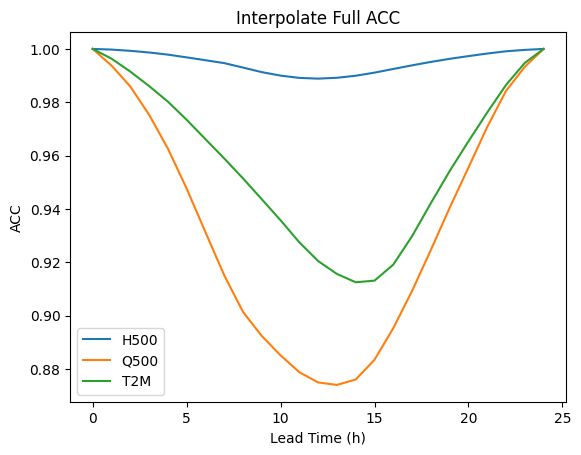

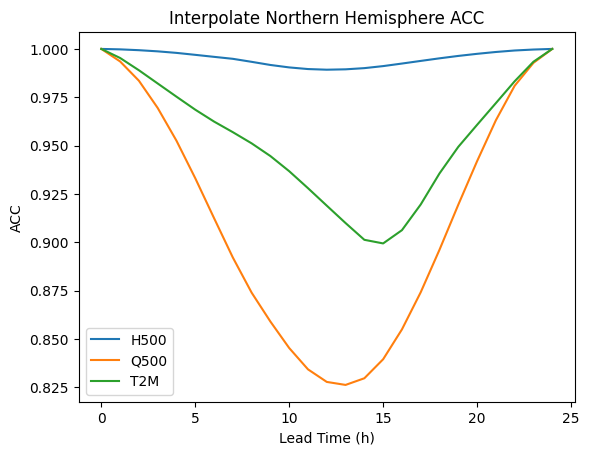

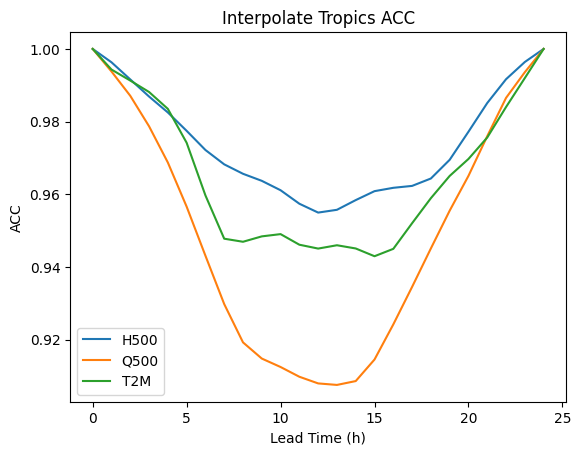

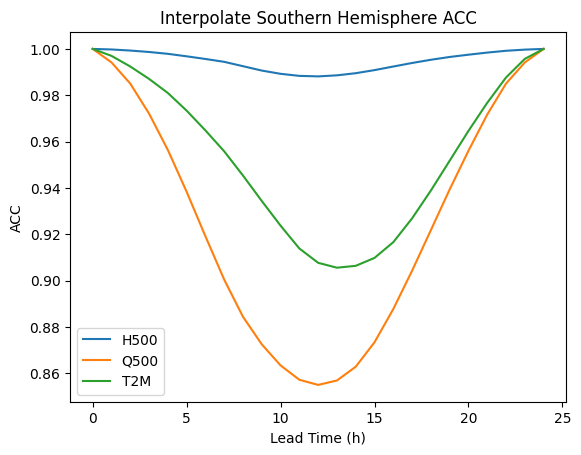

In [16]:
prefix = 'Interpolate'
c = np.load(directory + '/anomaly_full.npy')
plot_multiple_corr(fields=(1,4,7), prefix=prefix + ' Full')
c = np.load(directory + '/anomaly_north.npy')
plot_multiple_corr(fields=(1,4,7), prefix=prefix + ' Northern Hemisphere')
c = np.load(directory + '/anomaly_equator.npy')
plot_multiple_corr(fields=(1,4,7), prefix=prefix + ' Tropics')
c = np.load(directory + '/anomaly_south.npy')
plot_multiple_corr(fields=(1,4,7), prefix=prefix + ' Southern Hemisphere')

In [5]:
np.arange(24,0,-1)

array([24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,
        7,  6,  5,  4,  3,  2,  1])

In [23]:
def plot_interp_corr(fields, prefix=''):
    parent_dir = '/discover/nobackup/awang17/SFNO/'
    data = {
        'Forward ': np.load(parent_dir + 'afno_backbone_finetune/2/anomaly_full.npy'),
        'Backward ': np.load(parent_dir + 'backward/afno_backbone_finetune/1/anomaly_full.npy'),
        'Interpolate ': np.load(parent_dir + 'interpolate/anomaly_full.npy'),
    }
    times = {
        'Forward ': np.arange(24),
        'Backward ': np.arange(24,0,-1),
        'Interpolate ': np.arange(25)
    }
    styles = {
        'Forward ': 'dashed',
        'Backward ': 'dotted',
        'Interpolate ': 'solid'
    }
    ax = plt.gca()
    variables = ['H250', 'H500', 'H850', 'PS', 'Q500', 'Q850', 'SLP', 'T2M', 'T500', 'T850', 'TQV', 'U10M', 'U250', 'U500', 'U850', 'V10M', 'V250', 'V500', 'V850']
    for field in fields:
        color=next(ax._get_lines.prop_cycler)['color']
        for key, acc in data.items():
            time = times[key]
            plt.plot(time, acc[:,field], label=key + variables[field], linestyle=styles[key], color=color)
    plt.xlabel('Lead Time (h)')
    plt.ylabel('ACC')
    plt.title(prefix+' ACC')
    plt.legend()
    plt.show()

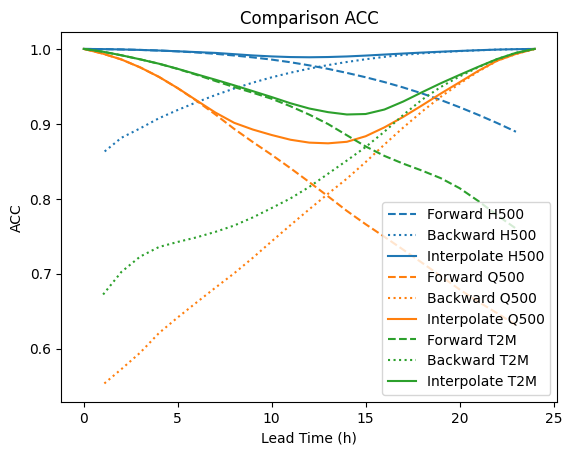

In [24]:
plot_interp_corr([1,4,7], prefix='Comparison')

In [30]:
from datetime import datetime, timedelta

In [31]:
start = datetime(2020, 1, 1, 0, 0, 0)
start

datetime.datetime(2020, 1, 1, 0, 0)

In [36]:
offset = start + timedelta(hours=3528)

In [41]:
"{:02d}{:02d}".format(offset.month, offset.day)

'0527'

In [40]:
offset

datetime.datetime(2020, 5, 27, 0, 0)

In [5]:
import xarray as xr

In [6]:
m = xr.open_dataset('/css/merra2/MERRA2_all/Y2020/M12/MERRA2.tavg1_2d_slv_Nx.20201223.nc4')

In [7]:
m['Q500']

<xarray.DataArray 'Q500' (time: 24, lat: 361, lon: 576)>
[4990464 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * time     (time) datetime64[ns] 2020-12-23T00:30:00 ... 2020-12-23T23:30:00
Attributes:
    long_name:       specific_humidity_at_500_hPa
    units:           kg kg-1
    fmissing_value:  1000000000000000.0
    standard_name:   specific_humidity_at_500_hPa
    vmax:            1000000000000000.0
    vmin:            -1000000000000000.0
    valid_range:     [-1.e+15  1.e+15]

In [8]:
m['Q500'].data

array([[[0.00021488, 0.00021488, 0.00021488, ..., 0.00021488,
         0.00021488, 0.00021488],
        [0.00016904, 0.00016881, 0.00016857, ..., 0.00016988,
         0.00016958, 0.00016934],
        [0.00011302, 0.00011248, 0.00011194, ..., 0.00011457,
         0.00011406, 0.00011355],
        ...,
        [0.00016702, 0.00016708, 0.00016714, ..., 0.00016684,
         0.0001669 , 0.00016696],
        [0.0001722 , 0.00017226, 0.00017232, ..., 0.00017208,
         0.00017214, 0.0001722 ],
        [0.00017983, 0.00017983, 0.00017983, ..., 0.00017983,
         0.00017983, 0.00017983]],

       [[0.00021577, 0.00021577, 0.00021577, ..., 0.00021577,
         0.00021577, 0.00021577],
        [0.00017506, 0.00017483, 0.00017465, ..., 0.00017572,
         0.00017548, 0.00017524],
        [0.00011787, 0.00011731, 0.00011671, ..., 0.00011954,
         0.00011901, 0.00011844],
        ...,
        [0.00016922, 0.00016934, 0.0001694 , ..., 0.00016892,
         0.00016904, 0.0001691 ],
        [0.0

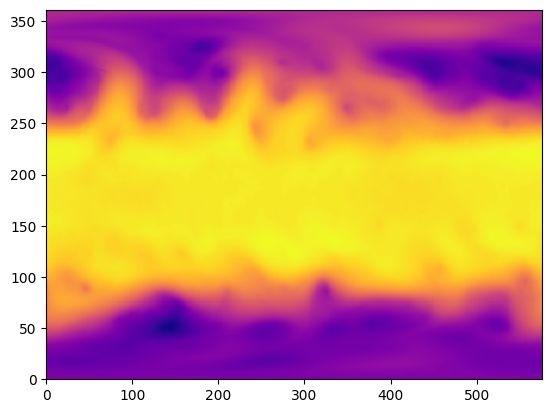

In [26]:
plt.pcolormesh(c[10, :, :], cmap='plasma')
plt.show()

In [40]:
m['T2M'].data

array([[[244.16364, 244.16364, 244.16364, ..., 244.16364, 244.16364,
         244.16364],
        [243.72614, 243.73395, 243.74176, ..., 243.71051, 243.71832,
         243.72614],
        [242.91364, 242.92145, 242.92926, ..., 242.89801, 242.90582,
         242.91364],
        ...,
        [252.80426, 252.81207, 252.82379, ..., 252.77692, 252.78864,
         252.79645],
        [253.6402 , 253.6441 , 253.64801, ..., 253.62848, 253.63239,
         253.63629],
        [255.0191 , 255.0191 , 255.0191 , ..., 255.0191 , 255.0191 ,
         255.0191 ]],

       [[244.0921 , 244.0921 , 244.0921 , ..., 244.0921 , 244.0921 ,
         244.0921 ],
        [243.6546 , 243.66241, 243.66241, ..., 243.63898, 243.64679,
         243.64679],
        [242.95929, 242.9671 , 242.97491, ..., 242.94366, 242.95148,
         242.95148],
        ...,
        [253.19366, 253.20148, 253.20538, ..., 253.17413, 253.17804,
         253.18585],
        [254.4046 , 254.40851, 254.41241, ..., 254.39679, 254.4007 ,
   

In [2]:
import torch

/discover/nobackup/awang17/envs/fcn/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
test = torch.zeros(5)
test

tensor([0., 0., 0., 0., 0.])

In [5]:
test[::-1]

ValueError: step must be greater than zero